In [3]:
# Step 1 - create SQLite DB 
import sqlite3

conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_data (
    id INTEGER PRIMARY KEY,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    customer_name TEXT,
    category TEXT,
    status TEXT,
    payment_method TEXT,
    total_amount REAL
)
''')

conn.commit()



In [4]:
# Step 2 -  Insert Sample Data

sample_data = [
    ('2021-06-12', 'Laptop', 3, 999.99, 'Rohan Sharma', 'Electronics', 'Delivered', 'UPI', 3 * 999.99),
    ('2021-06-13', 'Smartphone', 5, 699.50, 'Priya Mehta', 'Electronics', 'Shipped', 'Credit Card', 5 * 699.50),
    ('2021-06-14', 'Headphones', 10, 49.99, 'Amit Verma', 'Accessories', 'Delivered', 'Cash', 10 * 49.99),
    ('2021-06-15', 'Office Chair', 2, 150.00, 'Neha Gupta', 'Furniture', 'Pending', 'Debit Card', 2 * 150.00),
    ('2021-06-16', 'T-Shirt', 8, 19.99, 'Rahul Kumar', 'Clothing', 'Delivered', 'UPI', 8 * 19.99)
]

cursor.executemany('''
INSERT INTO sales_data
(date, product, quantity, price, customer_name, category, status, payment_method, total_amount)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
''', sample_data)

conn.commit()

In [5]:
# Step 3 - Query with  SQl and Load with Pandas

import pandas as pd

query = "SELECT * From sales_data where  quantity > 3;"
df = pd.read_sql(query, conn)
print(df)

   id        date     product  quantity   price customer_name     category  \
0   2  2021-06-13  Smartphone         5  699.50   Priya Mehta  Electronics   
1   3  2021-06-14  Headphones        10   49.99    Amit Verma  Accessories   
2   5  2021-06-16     T-Shirt         8   19.99   Rahul Kumar     Clothing   

      status payment_method  total_amount  
0    Shipped    Credit Card       3497.50  
1  Delivered           Cash        499.90  
2  Delivered            UPI        159.92  


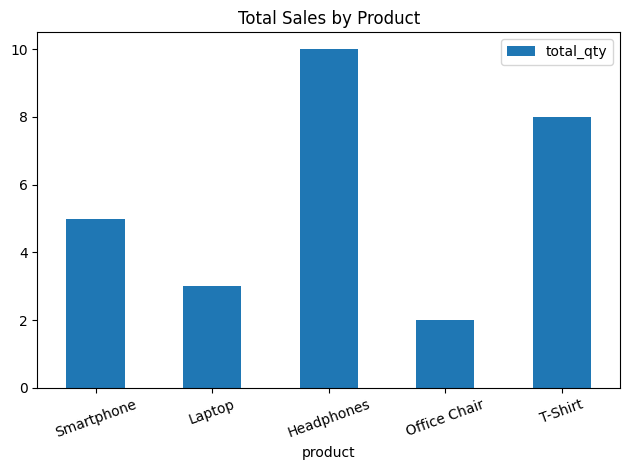

In [6]:
# Step 4 - Group & Visualize 

summary_query = '''
SELECT 
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales_data
GROUP BY product
ORDER BY total_revenue DESC;
'''
summary_df = pd.read_sql(summary_query, conn)

import matplotlib.pyplot as plt

summary_df.plot(kind='bar',x='product', y='total_qty' , title='Total Sales by Product')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [7]:
conn.close()